In [6]:
import kfood_dataset
import tensorflow as tf
paths = kfood_dataset.get_image_paths()

dataset path : /Users/hwijin/Desktop/Code/ml/KFood/kfood True
saving classes, labels...
saving crop information...
ready!
finding image paths...
shuffling...
paths ready!


In [7]:
train_set = kfood_dataset.make_kfood_dataset(paths[10000:])
test_set = kfood_dataset.make_kfood_dataset(paths[:10000])

2022-01-29 19:50:28.835123: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-01-29 19:50:28.837680: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


tf.Tensor([[22]], shape=(1, 1), dtype=int64)
tf.Tensor([[61]], shape=(1, 1), dtype=int64)
tf.Tensor([[139]], shape=(1, 1), dtype=int64)
tf.Tensor([[0]], shape=(1, 1), dtype=int64)
tf.Tensor([[121]], shape=(1, 1), dtype=int64)
tf.Tensor([[111]], shape=(1, 1), dtype=int64)
tf.Tensor([[89]], shape=(1, 1), dtype=int64)
tf.Tensor([[36]], shape=(1, 1), dtype=int64)


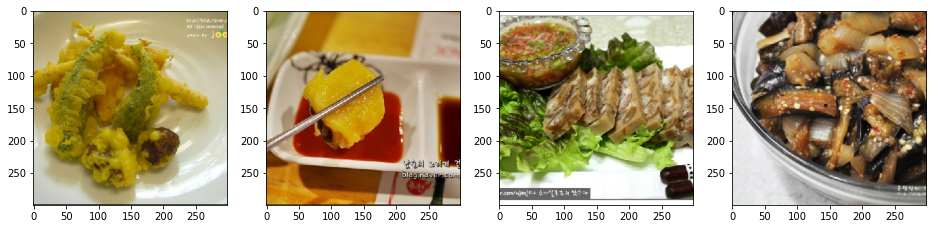

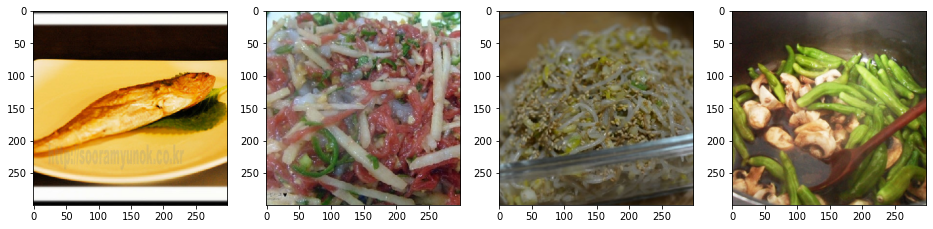

In [8]:
kfood_dataset.plot_dataset_image_4(train_set)
kfood_dataset.plot_dataset_image_4(test_set)

In [1]:
import tensorflow as tf
from tensorflow import keras


In [9]:
import kfood_model
model = kfood_model.make_InceptionResNetV2()


In [10]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 299, 299, 3)]     0         
_________________________________________________________________
stem_1 (Stem)                (None, 35, 35, 384)       604256    
_________________________________________________________________
inception_res_net_a_5 (Incep (None, 35, 35, 384)       287424    
_________________________________________________________________
inception_res_net_a_6 (Incep (None, 35, 35, 384)       287424    
_________________________________________________________________
inception_res_net_a_7 (Incep (None, 35, 35, 384)       287424    
_________________________________________________________________
inception_res_net_a_8 (Incep (None, 35, 35, 384)       287424    
_________________________________________________________________
inception_res_net_a_9 (Incep (None, 35, 35, 384)       2874

In [18]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [19]:
images, labels = next(iter(train_set.take(1)))

In [20]:
history = model.fit(images, labels, epochs=1)

2022-01-29 19:53:18.083519: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 16s 16s/step - loss: 6.0771 - accuracy: 0.0000e+00


In [2]:
inputs = keras.layers.Input(shape=[299, 299, 3])
model = keras.applications.inception_resnet_v2.InceptionResNetV2(include_top=False, weights=None)
model.summary()

2022-01-27 20:12:39.434987: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-01-27 20:12:39.435317: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1 Pro

systemMemory: 32.00 GB
maxCacheSize: 10.67 GB

Model: "inception_resnet_v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, None, None, 3 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, None, None, 3 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, None, None, 3 0           batch_normalization[0][0]       

In [5]:
inputs = keras.layers.Input(shape=[299, 299, 3])
inception_output = keras.applications.inception_resnet_v2.InceptionResNetV2(include_top=False, weights=None)
z = keras.layers.GlobalAvgPool2D()(inception_output)
outputs = keras.layers.Dense(150, activation='softmax')(z)

model = keras.models.Model(inputs=[inputs], outputs=[outputs])
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 299, 299, 3)]     0         
_________________________________________________________________
inception_resnet_v2 (Functio (None, None, None, 1536)  54336736  
_________________________________________________________________
global_average_pooling2d (Gl (None, 1536)              0         
_________________________________________________________________
dense (Dense)                (None, 150)               230550    
Total params: 54,567,286
Trainable params: 54,506,742
Non-trainable params: 60,544
_________________________________________________________________


In [6]:
import datetime
import os

now = datetime.datetime.now()
#model_name = 'InceptionResNetV2'
#model_paths = 'drive/MyDrive/Model/kfood/{}/'.format(model_name)
#if not os.path.exists(model_paths):
    #os.mkdir(model_paths)


class CustomSaver(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        fileformats = [now.year, now.month, now.day, now.hour, now.minute, epoch]
#        self.model.save(model_paths + "{}_{}_{}_{}_{}_{}.hd5".format(*fileformats))

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [7]:
history = model.fit(train_set, epochs=1, steps_per_epoch=500)

2022-01-26 16:23:48.775152: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


 33/500 [>.............................] - ETA: 12:49 - loss: 5.2516 - accuracy: 0.0123

KeyboardInterrupt: 